In [1]:
%matplotlib inline
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
import corner
import pickle 
import thejoker as tj
import astropy.units as u

home_dir = '../../'

from plot import draw_corner, draw_kepler_results
from utils import rv_model, log_likelihood, log_prior, sample_prior, get_kepler_params_and_log_jac

In [2]:
random_id = '9965'

with open(home_dir + 'results_{:s}.pkl'.format(random_id), 'rb') as f:
    results = pickle.load(f)
# ], results
# chains, nf_samples, prior_samples, optimized_init, config, true_params, n_obs,rv_obs, t, prior_kwargs, rv_err, loss_vals, local_accs, global_accs = results['chains'], results['nf_samples'], results['prior_samples'], results['optimized_init'], results['config'], results['true_params'], results['n_obs'], results['rv_obs'], results['t'], results['prior_kwargs'], results['rv_err'], 
# results['loss_vals'['local_accs'], results['global_accs']

for key,val in results.items():
        exec(key + '=val')

labels = ['v0', 'log_s2', 'log_period', 'log_k', 'sin_phi_',
                            'cos_phi_', 'ecc_', 'sin_w_', 'cos_w_']

(-10.0, 200.0)

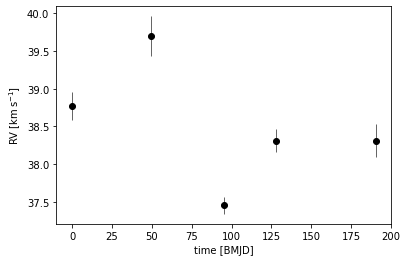

In [4]:
t = [0., 49.452, 95.393, 127.587, 190.408]
rv = [38.77, 39.70, 37.45, 38.31, 38.31] * u.km/u.s
err = [0.184, 0.261, 0.112, 0.155, 0.223] * u.km/u.s 
data = tj.RVData(t=t, rv=rv, rv_err=err
ax = data.plot() 
ax.set_xlim(-10, 200) 


In [6]:
prior = tj.JokerPrior.default(P_min=2*u.day, P_max=256*u.day,
                              sigma_K0=30*u.km/u.s,
                              sigma_v=100*u.km/u.s)

In [7]:
joker = tj.TheJoker(prior)
prior_samples = prior.sample(size=100_000)
samples = joker.rejection_sample(data, prior_samples) 

(array([10106.,  9983., 10022.,  9977.,  9918.,  9982.,  9878., 10151.,
        10000.,  9983.]),
 array([-3.14150941e+00, -2.51320025e+00, -1.88489110e+00, -1.25658195e+00,
        -6.28272795e-01,  3.63579053e-05,  6.28345511e-01,  1.25665466e+00,
         1.88496382e+00,  2.51327297e+00,  3.14158212e+00]),
 <BarContainer object of 10 artists>)

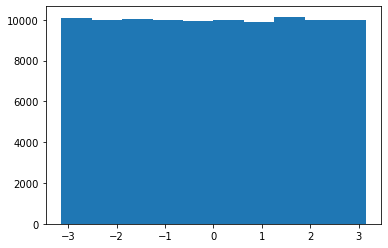

In [17]:
samples['P'].to_value(u.day)


(array([3., 1., 1., 1., 0., 3., 1., 3., 0., 2.]),
 array([-2.97351544, -2.44255522, -1.91159501, -1.3806348 , -0.84967459,
        -0.31871438,  0.21224583,  0.74320605,  1.27416626,  1.80512647,
         2.33608668]),
 <BarContainer object of 10 artists>)

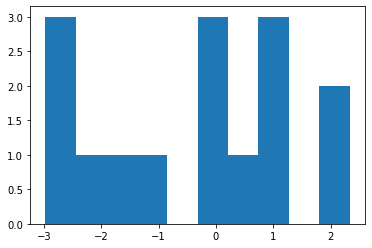

In [14]:
plt.hist(samples['omega'].to_value(u.rad))